# Simple ConvNet on Cifar-10

INPUT ⇒ CONV ⇒ RELU ⇒ FC

Simple ConvNet Architecture 구현

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

class ConvNet:
    @staticmethod
    # staticmethod를 안쓰면
    # instance = ConvNet()
    # model = instance.build(...) 이렇게 써야되는데
    #저걸로 그냥 ConcNet.build(...) 바로 쓸수 있어

    def build(width, height, depth, classes):
        # initialize the model along with the input shape to be
        # "channels last"
        model = Sequential()
        inputShape = (height, width, depth)

        # define the first (and only) CONV => RELU layer
        model.add(Conv2D(32, (3, 3), padding="same",
                                            input_shape=inputShape)) # 32 -> 필터 갯수 (3,3) -> 크기
        model.add(Activation("relu"))

        # softmax classifier
        model.add(Flatten())
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10

import matplotlib.pyplot as plt
import numpy as np

Loading CIFAR-10 data

In [ ]:
((trainX, trainY), (testX, testY)) = cifar10.load_data()

Modify data to train in MLP model
* Change value range from 0 to 1

In [ ]:
# insert code
trainX.shape, trainX.min(), trainX.max()

((50000, 32, 32, 3), 0, 255)

In [ ]:
trainX = trainX / 255.0
testX = testX / 255.0

In [ ]:
trainX.min(),trainX.max()

(0.0, 1.0)

In [ ]:
trainY[0]

array([6], dtype=uint8)

Change label to one-hot encoder

In [ ]:
# insert code
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [ ]:
trainY[0], testY[0]

(array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32))

In [ ]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
              "dog", "frog", "horse", "ship", "truck"]

Compiling model

In [ ]:
model = ConvNet.build(width = 32, height = 32, depth = 3, classes = 10)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                327690    
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 328,586
Trainable params: 328,586
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'categorical_crossentropy', 
                      optimizer = SGD(0.01),
                      metrics = ['accuracy']) # binary_categorical - 둘중하나로 분류

Training network

In [ ]:
H = model.fit(trainX,trainY,validation_data = (testX,testY),epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8291 - accuracy: 0.3573 - val_loss: 1.6786 - val_accuracy: 0.4160
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5850 - accuracy: 0.4499 - val_loss: 1.5638 - val_accuracy: 0.4542
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4292 - accuracy: 0.5019 - val_loss: 1.3784 - val_accuracy: 0.5165
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3309 - accuracy: 0.5367 - val_loss: 1.3294 - val_accuracy: 0.5304
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2716 - accuracy: 0.5570 - val_loss: 1.4141 - val_accuracy: 0.4882
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2284 - accuracy: 0.5703 - val_loss: 1.3019 - val_accuracy: 0.5402
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1933 - accuracy: 0.5831 - val_loss: 1.3085 - val_accuracy:

Evaluating network

In [ ]:
model.evaluate(testX, testY, batch_size=32, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 1.2988 - accuracy: 0.5972


[1.2987830638885498, 0.5971999764442444]

Plot the training loss and accuracy

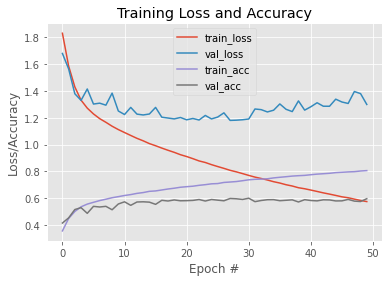

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

## serializing network

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [ ]:
cd gdrive/My\ Drive/Colab\ Notebooks/dl_vision/day3

[Errno 2] No such file or directory: 'gdrive/My Drive/Colab Notebooks/dl_vision/day3'
/content/gdrive/My Drive/Colab Notebooks/dl_vision


In [ ]:
model.save("convnet_weights.hdf5")

In [ ]:
ls -lh convnet_weights.hdf5

-rw------- 1 root root 1.3M Aug 20 02:45 convnet_weights.hdf5
